In [1]:
import pulp
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
### solution based on https://github.com/ew398/Jane-Street-Puzzles/blob/master/2014-02-Hooks.py
### preping for the later "Hooks" puzzles by setting up the various hooks and a nice graph

def setup_grid(alignments):
    y = np.array([[1]])
    for i in range(0,8):
        temp = np.ones((i+2,i+2),dtype=int)*(i+2)
        if alignments[i] == 0:         
            temp[:-1,:-1] = y
        if alignments[i] == 1:         
            temp[1:,:-1] = y
        if alignments[i] == 2:         
            temp[:-1,1:] = y
        if alignments[i] == 3:         
            temp[1:,1:] = y                  
        y=temp
    return y

    
def solve_matrix(y,col_labels,row_labels):
    nums = range(1, 10)
    problem = pulp.LpProblem('Problem') 
    x = pulp.LpVariable.dicts('x', [(row, col) for row in nums for col in nums],lowBound=0,upBound=1, cat='Integer') # declare decision variables

    for index in nums:
        mask = (y == index)
        problem += pulp.lpSum([x[(row, col)] * mask[row-1,col-1] for row in range(1, 10) for col in range(1,10)]) == index

    for row in nums:
        problem += pulp.lpSum([y[row-1, col-1] * x[(row, col)] for col in nums]) == col_labels[row - 1]

    for col in nums:
        problem += pulp.lpSum([y[row-1, col-1] * x[(row, col)] for row in nums]) == row_labels[col - 1]

#Solve LP
    problem.solve()

    solution = np.zeros((9,9),dtype=int)
    for row in nums:
        for col in nums:
            solution[row - 1][col - 1] = x[(row, col)].varValue

    return np.array(solution) , y

def sol_print(solved,matrix):
    fig,ax = plt.subplots(1,1,figsize=(5,5))
    x = np.array((solved*matrix).astype('int').astype('str'))
    x[x=="0"] ="-"
    ax = sns.heatmap(matrix,annot=x,cbar=False,cmap="Set3_r",fmt="",linewidths=0.25)
    ax.axis("off")


Solution took 0.2431 seconds

row check [0 0 0 0 0 0 0 0 0]
col check [0 0 0 0 0 0 0 0 0]




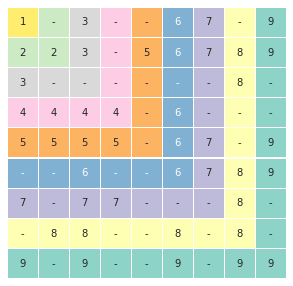

In [3]:
start =  time.perf_counter()

alignments = [0,0,0,0,0,0,0,0]
row_labels = [31, 19, 45, 16, 5, 47, 28, 49, 45]
col_labels = [26, 42, 11, 22, 42, 36, 29, 32, 45]

y = setup_grid(alignments)
solved,matrix = solve_matrix(y,col_labels,row_labels)

stop =  time.perf_counter()
print('Solution took {:0.4f} seconds\n'.format((stop-start)))
sol_print(solved,matrix)

print("row check",np.sum(solved*matrix,axis=0)-row_labels)
print("col check",np.sum(solved*matrix,axis=1)-col_labels)
print("\n")